In [21]:
from IPython.display import IFrame

In [22]:
experiment = "results/popa"

In [23]:
IFrame(src=experiment+"/policy_loss.html", width=500, height=500)

In [24]:
IFrame(src=experiment+"/train_rewards.html", width=500, height=500)

In [25]:
IFrame(src=experiment+"/test_rewards.html", width=500, height=500)

In [27]:
import torch
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd


def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed



In [29]:
def plot_train_rewards(flocs, names, smoothing=0.9):
    
    for i in range(0, len(flocs)):
        metrics = torch.load(flocs[i])
        train_rewards = smooth(metrics["train_rewards"], smoothing)
        df = pd.DataFrame({"train_rewards" : train_rewards, "episodes": np.arange(len(train_rewards))+1})
        ax = sns.lineplot(x = "episodes", y="train_rewards", data=df, label=names[i])

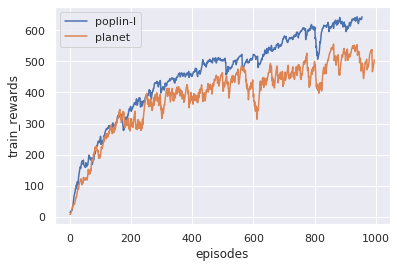

In [30]:
smoothing = 0.9
flocs = []
names = []

flocs.append("results/pop_trial/metrics.pth")
names.append("poplin-l")

flocs.append("/mnt/data/mamini/planet/original/metrics.pth")
names.append("planet")

plot_train_rewards(flocs, names, smoothing)

In [19]:
len(metrics["test_rewards"])

94

In [20]:
metrics["test_episodes"]

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 610,
 620,
 630,
 640,
 650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940]

In [39]:
a = np.ones(1000)

gamma = 0.9
returns = 0
for i in range(len(a)):
    returns += (gamma**i)*a[i]

print(returns)

9.999999999999993


In [41]:
import math
math.exp(-5)

0.006737946999085467